In [0]:
# Copyright 2018 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import trustscore
import trustscore_evaluation

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [0]:
datasets = [(X_iris, y_iris), (X_digits, y_digits)]
dataset_names = ["Iris", "Digits"]

# Example Usage

In [0]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression on digits.
model = LogisticRegression()
model.fit(X_digits[:1300], y_digits[:1300])
# Get outputs on testing set.
y_pred = model.predict(X_digits[1300:])
# Initialize trust score.
trust_model = trustscore.TrustScore()
trust_model.fit(X_digits[:1300], y_digits[:1300])
# Compute trusts score, given (unlabeled) testing examples and (hard) model predictions.
trust_score = trust_model.get_score(X_digits[1300:], y_pred)


# Example comparison to model confidence

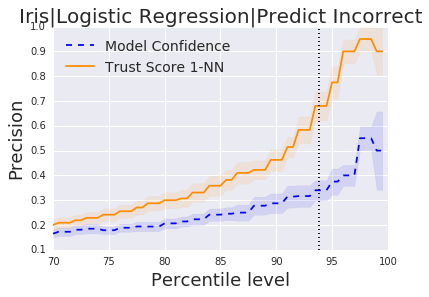

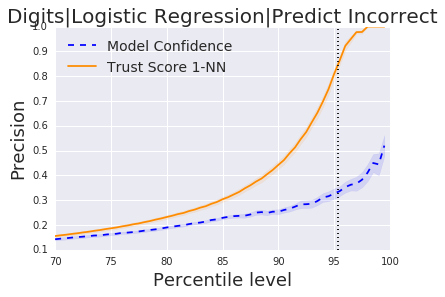

In [0]:
for dataset_idx,  dataset_name in enumerate(dataset_names):
  extra_plot_title = dataset_name + "|Logistic Regression|Predict Incorrect"
  percentile_levels = [70 + 0.5 * i for i in range(60)]
  signal_names = ["Trust Score 1-NN"]
  signals = [trustscore.TrustScore(k=10, alpha=0.1, filtering="none")]
  trainer = trustscore_evaluation.run_logistic
  X, y = datasets[dataset_idx]
  trustscore_evaluation.run_precision_recall_experiment_general(X, y, n_repeats=10, percentile_levels=percentile_levels, trainer=trainer, signal_names=signal_names, signals=signals, extra_plot_title=extra_plot_title, skip_print=True)

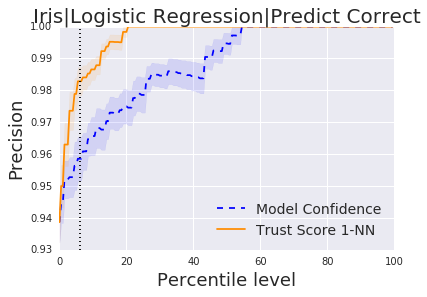

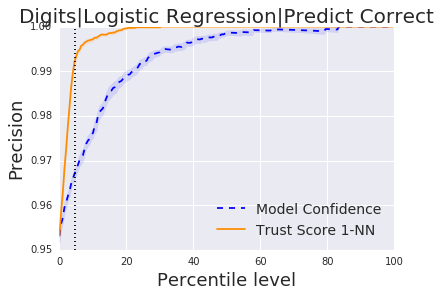

In [0]:
for dataset_idx,  dataset_name in enumerate(dataset_names):
  extra_plot_title = dataset_name + "|Logistic Regression|Predict Correct"
  percentile_levels = [0 + 0.5 * i for i in range(200)]
  signal_names = ["Trust Score 1-NN"]
  signals = [trustscore.TrustScore(k=10, alpha=0.1, filtering="none")]
  trainer = trustscore_evaluation.run_logistic
  X, y = datasets[dataset_idx]
  trustscore_evaluation.run_precision_recall_experiment_general(X, y, n_repeats=10, percentile_levels=percentile_levels, trainer=trainer, signal_names=signal_names, signals=signals, extra_plot_title=extra_plot_title, skip_print=True, predict_when_correct=True)